### OGC WMS

OGC Web Map Service is there for downloading rendered images of the map.

In [3]:
from owslib.wms import WebMapService

zm10_url = "http://geoportal.cuzk.cz/WMS_ZM10_PUB/WMService.aspx?service=WMS&request=getCapabilities"

useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"

zm10_wms = WebMapService(zm10_url, version="1.3.0", headers={"User-Agent":useragent})

print("WMS title: %s" % zm10_wms.identification.title)

print("WMS abstract: %s" % zm10_wms.identification.abstract)

print("Provider name: %s" % zm10_wms.provider.name)

print("Provider address: %s" % zm10_wms.provider.contact.address)

WMS title: Prohlížecí služba WMS - ZM 10
WMS abstract: Prohlížecí služba WMS-ZM10-P je poskytována jako veřejná prohlížecí služba nad daty Základní mapy ČR 1:10 000. Služba splňuje technické pokyny pro INSPIRE prohlížecí služby v. 3.1 a zároveň splňuje standard OGC WMS 1.1.1. a 1.3.0.
Provider name: Zeměměřický úřad
Provider address: Pod Sídlištěm 9


Check the [Capabilities response](http://geoportal.cuzk.cz/WMS_ZM10_PUB/WMService.aspx?service=WMS&request=getCapabilities) directly from the server

Available WMS layers:

In [4]:
print(zm10_wms.contents)

print(zm10_wms.contents['GR_ZM10'].boundingBox)

print(zm10_wms.contents['GR_ZM10'].boundingBoxWGS84)

OrderedDict([('GR_ZM10', <owslib.map.wms130.ContentMetadata object at 0x7efefac62a58>)])
(4140810.2570131817, 2430107.5856760163, 4619998.720259745, 2713834.431917131, 'EPSG:3034')
(12.048389659174287, 48.47262523104259, 18.886699446853417, 51.08438824509146)


Download and save the data (image)

In [8]:
img = zm10_wms.getmap(
    layers=['GR_ZM10'],
    size=[800, 600],
    srs="EPSG:5514",
    bbox=[-950003.175021186, -1250003.1750036045, -399990.474995786, -899996.8249909044],
    format="image/png",
    headers={"User-Agent":useragent})

out = open('../../outputs/zm10.png', 'wb')
out.write(img.read())
out.close()

Display image in Notebook

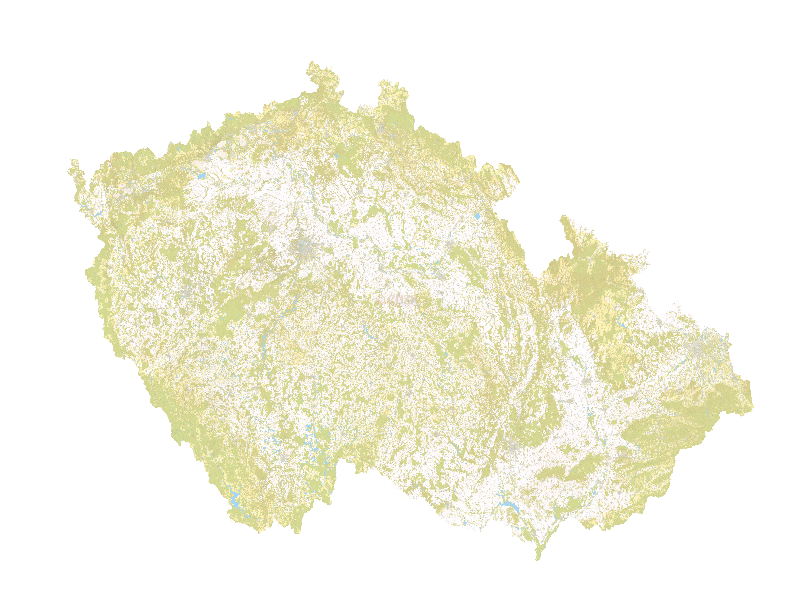

In [9]:
from IPython.display import Image
Image(filename='zm10.png')